# 목차 및 고찰
4장
-  범주형 변수
    - 원 핫 인코딩
        - pd.get_dummies(), 객체타입(문자열 같은)이나 범주형을 가진 열을 자동으로 변환해줌, 숫자특성은 모두 연속형으로 간주함
    - 숫자로 표현된 범주형 특성
        - get_dummies()함수에서, 숫자를 astype함수를 이용해서, str로 바꿔서 원핫인코딩을 해줄 수 있음
    - OneHotEncoder와 ColumnTransformer
        - sklearn의 onehotencoder는 모든 특징이 범주형이라고 가정함
    - make_column_transformer, ColumnTransformer두개의 차이는 이름을 자동으로 붙여주는지 수동으로 붙여주는지 차이가 있음
    - 구간 분할
        KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')과같이 onehot-dense를 encode로 넣어주면 matrix가 반환된다
     - PolynomialFeatures을 사용하면 linearregression을 사용해도 곡선을 예측한다.
     - 보스톤 주택가격
         - polynomialfrature에서 degree2는 [1,a,b,a제곱ab, b제곱]을 나타낸다
-  일변량 비선형 변환
    - 대부분의 모델이 정규분포일 때 좋은 성능을 내는 것에 착안
- 특성 자동 선택
    - 일변량(단변량)통계
        - SelectKBest, Selectperpercentile, 특성과 타깃사이의 중요한 통계적 관계가 있는지 계산하는 등
    - 모델 기반 선택
        - SelectFromModel
    - 반복적 선택
        - RFE
- 전문가 지식활용
    - 초기 데이터 선택할 때, 유용한 특징을 선택할 수 있게함

5장
- 교차검증
    - 기본 교차검증
        - cross_val_score, cross_validate
    - 계층별 k-겹 교차검증
        - StratifiedKFold
    - LOOCV(Leave-one-out cross-validation)
        - ShuffleSplit
    - cv에 GroupKFold를 넣으면 그룹은 나누지 않고 train과 test를 분리한다.
- Grid Search
    - 관심있는 매개변수의 조합을 시도
- 교차검증을 사용한 그리드 서치
- 비대칭 매개변수를 이용한 그리드 탐색
    - 딕셔너리를 이용해서, 커멀마나 사용하는 파라미터를 설정할 수 있음
- 중첩교차검증
    - train, test set으로 나누고 train set을 또 분리한다
- 불균형 데이터 셋에서 평가
    - accuracy로는 모델을 평가하는데 한계가 있음
    - DummyClassifier, 빈도가 가장 많은 것으로 예측함
- 오차행렬
- ROC
- AUC


In [1]:
#1. 원핫 인코딩

In [2]:
from preamble import *
%matplotlib inline
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#맥에서 폰트문제 해결하기
from matplotlib import rc
rc('font', family="AppleGothic")

In [4]:
import os
data = pd.read_csv("./adult.data", header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# 예제를 위해 몇개의 열만 선택합니다
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]
# IPython.display 함수는 주피터 노트북을 위해 포맷팅된 출력을 만듭니다
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [5]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [6]:
print("원본 특성:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))

원본 특성:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ 

In [7]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,...,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,...,0,0,1,0
1,50,13,0,0,...,0,0,1,0
2,38,40,0,0,...,0,0,1,0
3,53,40,0,0,...,0,0,1,0
4,28,40,0,0,...,0,0,1,0


In [8]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# NumPy 배열 추출
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
# 숫자로 표현된 범주형 특성
demo_df = pd.DataFrame({'숫자 특성': [0, 1, 2, 1],
                        '범주형 특성': ['양말', '여우', '양말', '상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [11]:
display(pd.get_dummies(demo_df))

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [12]:
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성', '범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0


In [13]:
#onehotencoder와 columntransformer
from sklearn.preprocessing import OneHotEncoder
# sparse=False로 설정하면 OneHotEncode가 희소 행렬이 아니라 넘파이 배열을 반환합니다
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [14]:
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출합니다
data_features = data.drop("income", axis=1)
# 데이터프레임과 income을 분할합니다
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [17]:
X_train_trans

array([[ 1.499, -0.445,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [ 2.38 , -1.668,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.25 , -0.037,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [-1.146, -0.037,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [ 0.471,  0.37 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [-0.999,  0.615,  0.   , ...,  0.   ,  0.   ,  0.   ]])

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

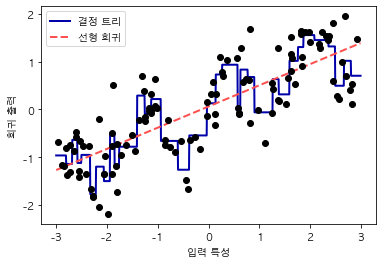

linear score: 0.63
Decision score: 0.86


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

dreg = DecisionTreeRegressor(min_samples_leaf=3).fit(X, y)
plt.plot(line, dreg.predict(line), label="결정 트리")

lreg = LinearRegression().fit(X, y)
plt.plot(line, lreg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show()
print("linear score: {:.2f}".format(lreg.score(X,y)))
print("Decision score: {:.2f}".format(dreg.score(X,y)))

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

In [23]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.967, -2.378, -1.789, -1.2  , -0.612, -0.023,  0.566,  1.155,
        1.744,  2.333,  2.921])]


In [24]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [25]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [26]:
X_binned[:10]

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [27]:
X_binned = kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [28]:
X_binned.shape

(120, 10)

In [29]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

In [30]:
X_binned.shape

(120, 10)

In [31]:
X_binned[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

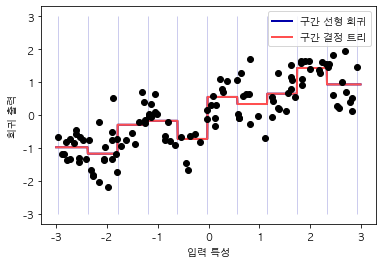

linear score: 0.72
Decision score: 0.72


In [34]:
line_binned = kb.transform(line)

lreg = LinearRegression().fit(X_binned, y)
plt.plot(line, lreg.predict(line_binned), label='구간 선형 회귀')

dreg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, dreg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.show()
print("linear score: {:.2f}".format(lreg.score(X_binned,y)))
print("Decision score: {:.2f}".format(dreg.score(X_binned,y)))


In [35]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


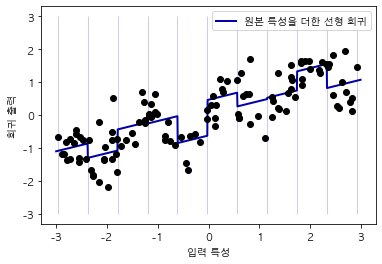

In [36]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

In [37]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(120, 20)


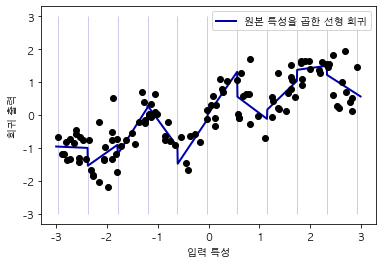

In [38]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show()

In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [40]:
print("X_poly.shape:", X_poly.shape)

X_poly.shape: (120, 10)


In [41]:
print("X 원소:\n", X[:5])
print("X_poly 원소:\n", X_poly[:5])

X 원소:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]]
X_poly 원소:
 [[   -0.753     0.567    -0.427     0.321    -0.242     0.182    -0.137
      0.103    -0.078     0.058]
 [    2.704     7.313    19.777    53.482   144.632   391.125  1057.714
   2860.36   7735.232 20918.278]
 [    1.392     1.938     2.697     3.754     5.226     7.274    10.125
     14.094    19.618    27.307]
 [    0.592     0.35      0.207     0.123     0.073     0.043     0.025
      0.015     0.009     0.005]
 [   -2.064     4.26     -8.791    18.144   -37.448    77.289  -159.516
    329.222  -679.478  1402.367]]


In [42]:
print("항 이름:\n", poly.get_feature_names())

항 이름:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


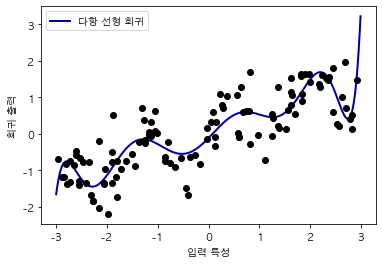

In [43]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='다항 선형 회귀')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show()

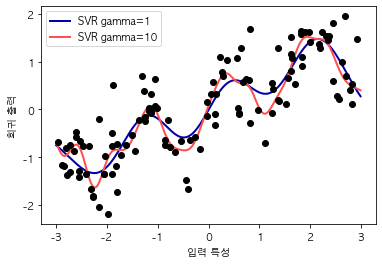

In [44]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show()

In [45]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                    random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:", X_train.shape)
print("X_train_poly.shape:", X_train_poly.shape)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [47]:
print("다항 특성 이름:\n", poly.get_feature_names())

다항 특성 이름:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.621
상호작용 특성이 있을 때 점수: 0.753


In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수: {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수: 0.795
상호작용 특성이 있을 때 점수: 0.775


In [50]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

[ 56  81  25  20  27  18  12  21 109   7]


In [51]:
print("특성 출현 횟수:\n", np.bincount(X[:, 0]))

특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

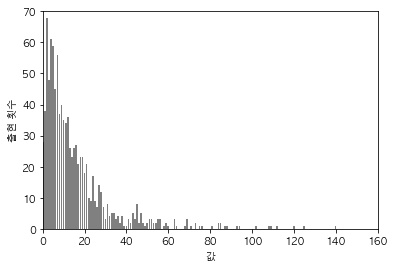

In [52]:
plt.xlim(0, 160)
plt.ylim(0, 70)
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")


In [53]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.622


In [54]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, '값')

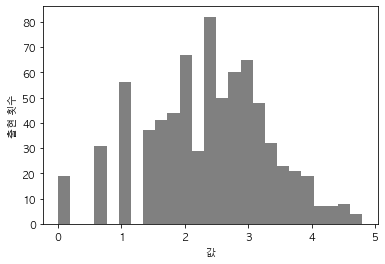

In [55]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [56]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.875


In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 고정된 난수를 발생시킵니다
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# 데이터에 노이즈 특성을 추가합니다
# 처음 30개는 원본 특성이고 다음 50개는 노이즈입니다
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)
# f_classif(기본값)와 SelectPercentile을 사용하여 특성의 50%를 선택합니다
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
# 훈련 세트에 적용합니다
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x7f920b512750>], [Text(0, 0, '')])

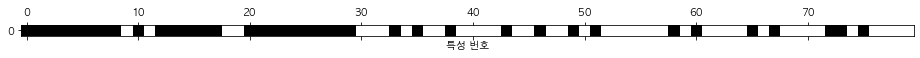

In [58]:
mask = select.get_support()
print(mask)
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])


In [59]:
from sklearn.linear_model import LogisticRegression

# 테스트 데이터 변환
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수: {:.3f}".format(
        lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.951
선택된 일부 특성을 사용한 점수: 0.933


In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [61]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([<matplotlib.axis.YTick at 0x7f920af98290>], [Text(0, 0, '')])

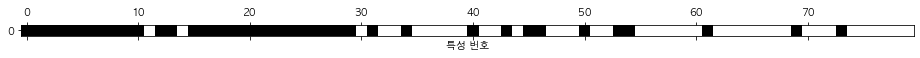

In [62]:
mask = select.get_support()
# True는 검은색, False는 흰색으로 마스킹합니다
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [63]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=5000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.947


([<matplotlib.axis.YTick at 0x7f920a3c50d0>], [Text(0, 0, '')])

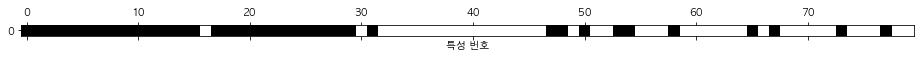

In [64]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# 선택된 특성을 표시합니다
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

In [65]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression(max_iter=5000).fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수: {:.3f}".format(score))

테스트 점수: 0.940


In [66]:
print("테스트 점수: {:.3f}".format(select.score(X_test, y_test)))

테스트 점수: 0.951


In [67]:
citibike = mglearn.datasets.load_citibike()

In [68]:
print("시티 바이크 데이터:\n", citibike.head())

시티 바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

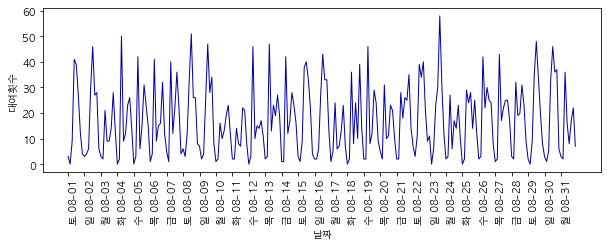

In [69]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
week = ["일", "월", "화","수", "목", "금", "토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"), 
                                              xticks.strftime(" %m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

In [70]:
# 타깃값 추출 (대여 횟수)
y = citibike.values
# POSIX 시간을 10**9로 나누어 변경
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [71]:
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용합니다
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듭니다
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눕니다
    X_train, X_test = features[:n_train], features[n_train:]
    # 타깃값도 나눕니다
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(X), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="훈련")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label="훈련 예측")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="테스트 예측")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 R^2: -0.04


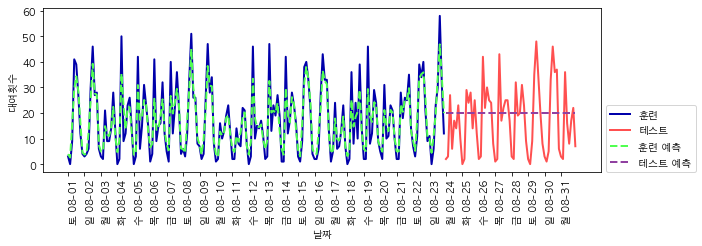

In [72]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
eval_on_features(X, y, regressor)

테스트 세트 R^2: 0.60


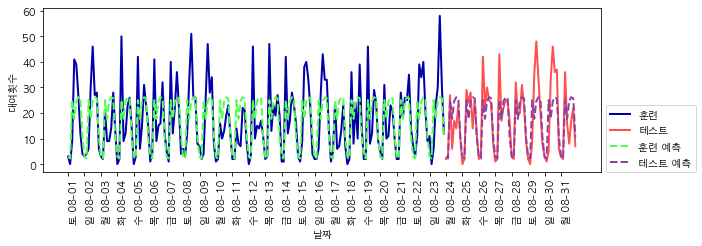

In [73]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

테스트 세트 R^2: 0.84


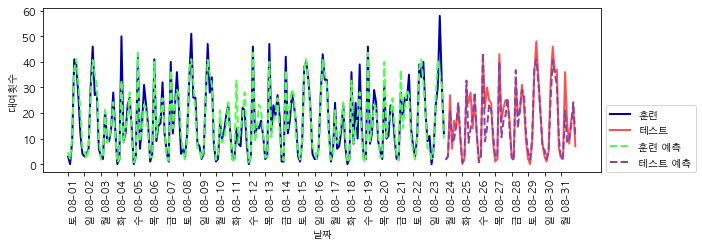

In [74]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: 0.13


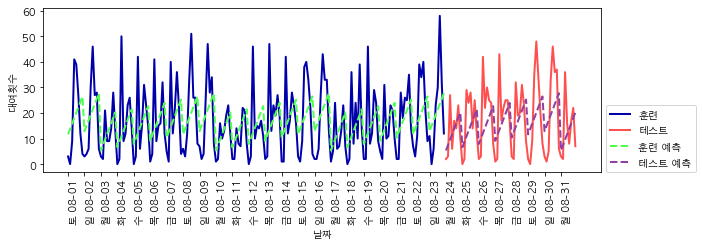

In [75]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [76]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

테스트 세트 R^2: 0.62


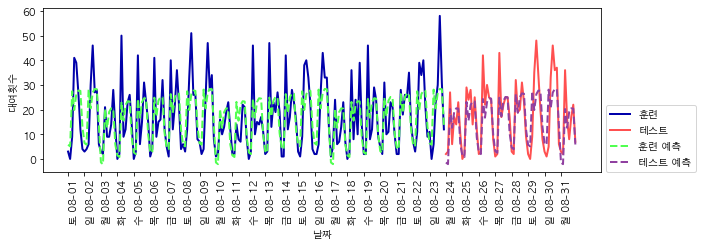

In [77]:
eval_on_features(X_hour_week_onehot, y, Ridge())

테스트 세트 R^2: 0.85


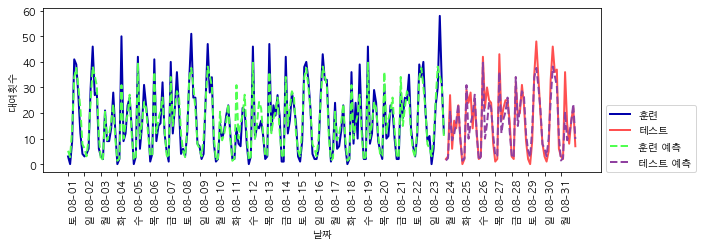

In [78]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,
                                      include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [79]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수", "목", "금", "토", "일"]
features =  day + hour

In [80]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0, 0.5, '계수 크기')

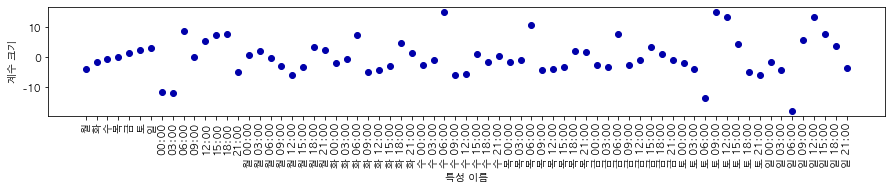

In [81]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")

In [82]:
from preamble import *
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


In [83]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.967 1.    0.933 0.967 1.   ]


In [84]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수:", scores)

교차 검증 점수: [1.    0.933 1.    1.    0.933 0.933 0.933 1.    1.    1.   ]


In [85]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.97


In [86]:
len(iris.data)

150

In [87]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


In [88]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.96  0.893 0.973 0.92  0.907 0.973 0.947 0.96  0.987 0.973]


In [89]:
from sklearn.model_selection import GroupKFold
# 인위적 데이터셋 생성
X, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고
# 다음은 네 개의 샘플이 같습니다.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.75  0.6   0.667]


In [90]:
from sklearn.svm import SVC
# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


In [91]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증을 적용합니다
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균을 계산합니다
        score = np.mean(scores)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

In [92]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("매개변수 그리드:\n", param_grid)

매개변수 그리드:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

In [95]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [96]:
print("테스트 세트 점수: {:.2f}".format(grid_search.score(X_test, y_test)))

테스트 세트 점수: 0.97


In [97]:
print("최적 매개변수:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 매개변수: {'C': 10, 'gamma': 0.1}
최고 교차 검증 점수: 0.97


In [98]:
print("최고 성능 모델:\n", grid_search.best_estimator_)

최고 성능 모델:
 SVC(C=10, gamma=0.1)


In [99]:
import pandas as pd
pd.set_option('display.max_columns', None)
# DataFrame으로 변환합니다
results = pd.DataFrame(grid_search.cv_results_)
# 처음 다섯 개 행을 출력합니다
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.0,0.0,0.0,0.0,0.0
std_fit_time,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0
param_C,0.0,0.0,0.0,0.0,0.0
param_gamma,0.0,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.35,0.35,0.35,0.35,0.35
split1_test_score,0.35,0.35,0.35,0.35,0.35
split2_test_score,0.36,0.36,0.36,0.36,0.36


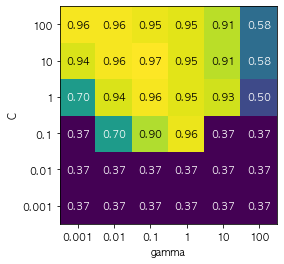

In [101]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

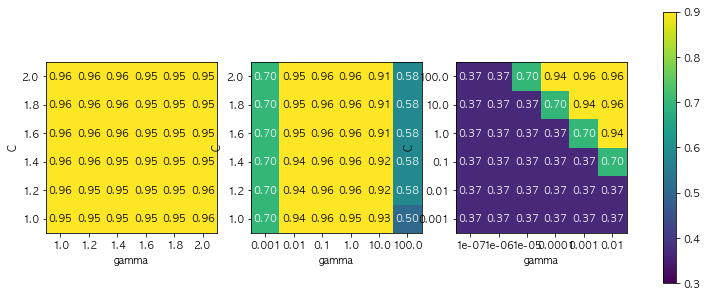

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax, vmin=0.3, vmax=0.9)
    
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

In [103]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("그리드 목록:\n", param_grid)

그리드 목록:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [104]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print("최적 파라미터:", grid_search.best_params_)
print("최고 교차 검증 점수: {:.2f}".format(grid_search.best_score_))

최적 파라미터: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
최고 교차 검증 점수: 0.97


In [105]:
results = pd.DataFrame(grid_search.cv_results_)
# 좀 더 나은 출력을 위해 결과를 전치시킵니다
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_fit_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_C,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.0,0.01,0.1,1,10,100
param_gamma,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,0.0,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.7,0.91,1.0,0.35,0.35,0.7,0.91,1.0,0.96,0.91,0.39,0.91,1.0,1.0,0.96,0.87,0.52,1.0,1.0,1.0,0.96,0.87,0.52,0.35,0.87,1.0,1.0,1.0,0.96
split1_test_score,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.35,0.7,0.91,0.91,0.35,0.35,0.7,0.91,0.96,0.91,0.96,0.43,0.91,0.96,0.96,0.96,0.91,0.52,0.96,0.91,0.96,0.96,0.91,0.52,0.35,0.87,0.91,0.96,1.0,0.96


In [106]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("교차 검증 점수: ", scores)
print("교차 검증 평균 점수: ", scores.mean())

교차 검증 점수:  [0.967 1.    0.967 0.967 1.   ]
교차 검증 평균 점수:  0.9800000000000001


In [107]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # outer_cv의 분할을 순회하는 for 루프
    # (split 메소드는 훈련과 테스트 세트에 해당하는 인덱스를 리턴합니다)
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 매개변수를 찾습니다
        best_parms = {}
        best_score = -np.inf
        # 매개변수 그리드를 순회합니다
        for parameters in parameter_grid:
            # 안쪽 교차 검증의 점수를 기록합니다
            cv_scores = []
            # inner_cv의 분할을 순회하는 for 루프
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # 훈련 데이터와 주어진 매개변수로 분류기를 만듭니다
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 세트로 평가합니다
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증의 평균 점수를 계산합니다
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 점수가 더 높은면 매개변수와 함께 기록합니다
                best_score = mean_score
                best_params = parameters
        # 바깥쪽 훈련 데이터 전체를 사용해 분류기를 만듭니다
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트를 사용해 평가합니다
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [108]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("교차 검증 점수:", scores)

교차 검증 점수: [0.967 1.    0.967 0.967 1.   ]


In [109]:
 from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [110]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값:", np.unique(pred_most_frequent))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [111]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [112]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.83
logreg 점수: 0.98


In [113]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


In [114]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.13
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.92


In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [117]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

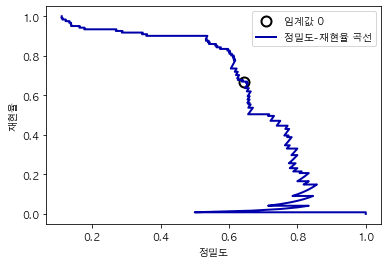

In [118]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

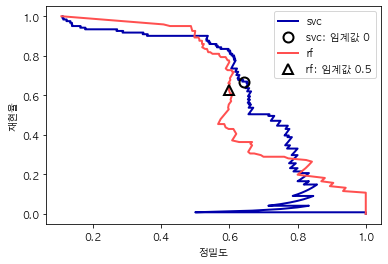

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="svc: 임계값 0", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

In [120]:
print("랜덤 포레스트의 f1_score: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("svc의 f1_score: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [121]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


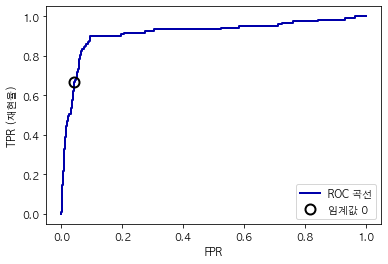

In [122]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
# 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

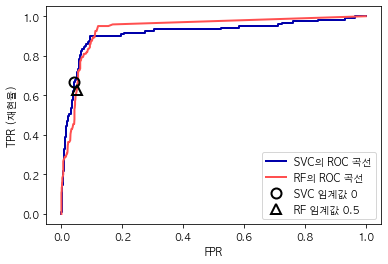

In [123]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [124]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916


gamma = 1.00  정확도 = 0.90  AUC = 0.50
gamma = 0.10  정확도 = 0.90  AUC = 0.96
gamma = 0.01  정확도 = 0.90  AUC = 1.00


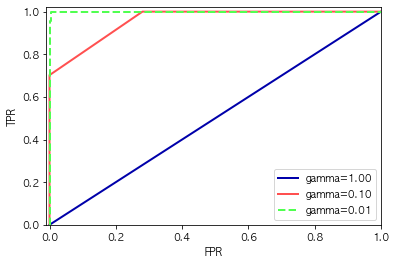

In [125]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}".format(
        gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.2f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

In [126]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n", confusion_matrix(y_test, pred))

정확도: 0.953
오차 행렬:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


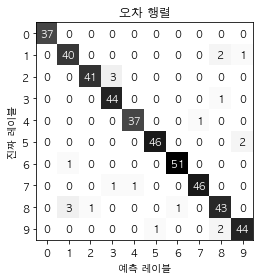

In [127]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("오차 행렬")
plt.gca().invert_yaxis()

In [128]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [129]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954


In [130]:
# 분류의 기본 평가 지표는 정확도 입니다
print("기본 평가 지표:",
      cross_val_score(SVC(), digits.data, digits.target == 9, cv=5))
# scoring="accuracy"의 결과와 같습니다.
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("정확도 지표:", explicit_accuracy)
ap =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="average_precision", cv=5)
print("평균 정밀도 지표:", ap)

기본 평가 지표: [0.975 0.992 1.    0.994 0.981]
정확도 지표: [0.975 0.992 1.    0.994 0.981]
평균 정밀도 지표: [0.976 0.989 1.    0.999 0.95 ]


In [132]:
from sklearn.model_selection import cross_validate


In [133]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "average_precision", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_average_precision,train_average_precision,test_recall_macro,train_recall_macro
0,0.04,0.04,0.97,0.99,0.98,0.99,0.89,0.97
1,0.02,0.03,0.99,1.00,0.99,1.00,0.96,0.98
2,0.02,0.03,1.00,1.00,1.00,1.00,1.00,0.98
3,0.02,0.03,0.99,1.00,1.00,1.00,0.97,0.98
4,0.02,0.03,0.98,1.00,0.95,1.00,0.90,0.99


In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드를 만듭니다
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# 기본 정확도 측정 지표를 사용합니다
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("정확도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (정확도)): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      accuracy_score(y_test, grid.predict(X_test))))

정확도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최상의 교차 검증 점수 (정확도)): 0.976
테스트 세트 평균 정밀도: 0.966
테스트 세트 정확도: 0.973


In [135]:
# 평균 정밀도 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision")
grid.fit(X_train, y_train)
print("평균 정밀도 지표를 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최상의 교차 검증 점수 (평균 정밀도): {:.3f}".format(grid.best_score_))
print("테스트 세트 평균 정밀도: {:.3f}".format(
      # grid.score 점수와 동일합니다
      average_precision_score(y_test, grid.decision_function(X_test))))
print("테스트 세트 정확도: {:.3f}".format(
      accuracy_score(y_test, grid.predict(X_test))))

평균 정밀도 지표를 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최상의 교차 검증 점수 (평균 정밀도): 0.988
테스트 세트 평균 정밀도: 0.996
테스트 세트 정확도: 0.896
